# Exploratory Data Analysis

In [29]:
# Ignorando mensagens de avisos.
import warnings
warnings.filterwarnings("ignore")

#
import pandas as pd
import colorsys

# Tratamento de dados
from itertools import compress

# visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#df = pd.read_pickle('..\\data\\df.pkl')

## Descriptive Statistical

In [30]:
# Obtem os dados
df = pd.read_csv('../data/MICRODADOS_BAIRROS.csv', error_bad_lines=False, encoding='latin1')
df2 = pd.read_csv('../data/MICRODADOS.csv', error_bad_lines=False, encoding='latin1', warn_bad_lines=False, sep=';', parse_dates=True)

b'Skipping line 1183: expected 9 fields, saw 10\n'


In [31]:
df2.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'],
      dtype='object')

In [32]:
#
df3 = df2[['Classificacao', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'DataObito']].dropna()
#
df3['Sintomas'] = df3[['Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade']].values.tolist()
#
df3.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas
755,Descartados,Não,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-05,"[Não, Sim, Sim, Sim, Não, Não, Sim, Não, Sim, ..."
761,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-04,"[Não, Sim, Não, Não, Não, Não, Não, Não, Não, ..."
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Não, Não, Sim, Não, Não, Não, Sim, Não, Não, ..."
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[Não, Sim, Não, Não, Não, Não, Sim, Não, Sim, ..."
7014,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-02,"[Não, Sim, Não, Não, Não, Não, Não, Não, Não, ..."


In [33]:
#
sintomas = ['Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade']
#
df3['Sintomas'] = df3['Sintomas'].apply(lambda x: [True if item=='Sim' else False for item in x])
#
df3['Sintomas'] = df3['Sintomas'].apply(lambda x: list(compress(sintomas, x)))
#
df3['Qntd_sintomas'] = df3['Sintomas'].apply(lambda x: len(x))
#
df3.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas
755,Descartados,Não,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-05,"[DificuldadeRespiratoria, Tosse, Coriza, Cefal...",6
761,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-04,[DificuldadeRespiratoria],1
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Tosse, Cefaleia]",2
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4
7014,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-02,[DificuldadeRespiratoria],1


In [34]:
#
df3['Classificacao'].value_counts()

Confirmados    11761
Descartados     3038
Suspeito          31
Name: Classificacao, dtype: int64

In [35]:
#
# df2.iloc[df3[df3['Qntd_sintomas']==0].index].head()
confirmados = df3[df3['Classificacao']=='Confirmados']
descartados = df3[df3['Classificacao']=='Descartados']
suspeitos = df3[df3['Classificacao']=='Suspeitos']
#confirmados['DataObito'] = pd.to_datetime(confirmados['DataObito'])
#descartados['DataObito'] = pd.to_datetime(descartados['DataObito'])
#suspeitos['DataObito'] = pd.to_datetime(suspeitos['DataObito'])
#
confirmados['Assintomatico'] = confirmados.Sintomas.apply(lambda x:  'sim' if x==[] else 'nao')
confirmados.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas,Assintomatico
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Tosse, Cefaleia]",2,nao
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4,nao
8889,Confirmados,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-03,"[DificuldadeRespiratoria, Tosse]",2,nao
21751,Confirmados,Não,Sim,Não,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-01,"[DificuldadeRespiratoria, Coriza, Cefaleia, Co...",5,nao
23172,Confirmados,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,2021-07-01,"[Febre, DificuldadeRespiratoria, ComorbidadePu...",4,nao


In [36]:
#
dic = {}
for i in confirmados['Sintomas'].apply(lambda x: x):
    for j in i:
        dic[j] = dic.get(j, 0) + 1
#
sintomas = pd.Series(dic)
sintomas_prop = round(sintomas / sintomas.sum() * 100, ndigits=2)
sintomas_prop.sort_values()

ComorbidadeRenal            1.38
ComorbidadeTabagismo        1.40
ComorbidadePulmao           2.13
ComorbidadeObesidade        2.86
Diarreia                    3.40
DorGarganta                 3.93
Coriza                      5.32
Cefaleia                    7.86
ComorbidadeDiabetes         8.25
DificuldadeRespiratoria    15.16
Febre                      15.25
ComorbidadeCardio          15.48
Tosse                      17.60
dtype: float64

Text(0.5, 0, '# de pessoas com o sintoma')

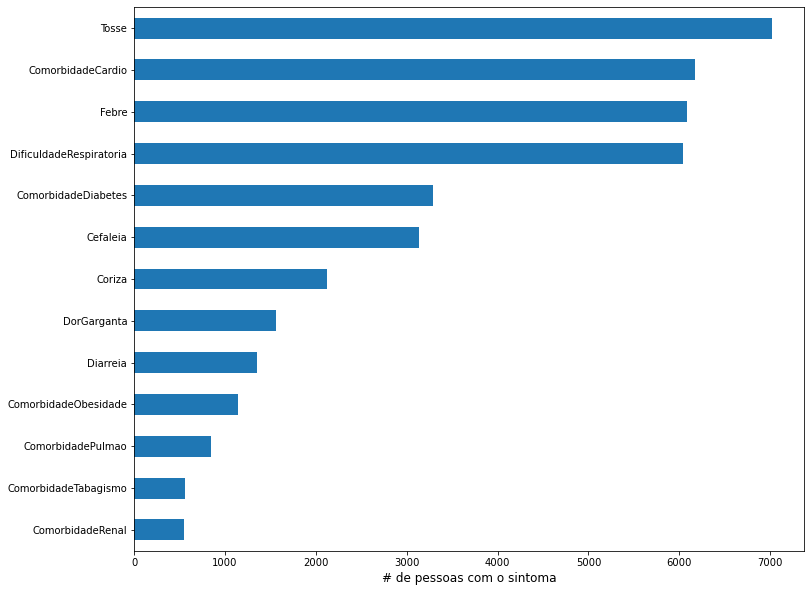

In [37]:
#
pd.DataFrame({'Qntd': sintomas}).sort_values('Qntd').plot.barh(legend=False, figsize=(12,10))
plt.xlabel('# de pessoas com o sintoma', fontsize=12)

É possível notar que **Tosse, Comorbidade Cardiorespiratória, Febre, Dificuldade respiratoria** são os sintomas mais recorrentes em pessoas com covid.

### Visualizando Distribuições de Dados

Uma etapa inicial em qualquer esforço para analisar ou modelar dados deve ser entender como as variáveis são distribuídas.<br> As técnicas de visualização de distribuição podem fornecer respostas rápidas a muitas perguntas importantes.
- Que intervalo as observações cobrem? 
- Qual é a tendência central deles? 
- Eles estão fortemente inclinados em uma direção? 
- Existem evidências de bimodalidade? 
- Existem outliers significativos? 
- As respostas a essas perguntas variam entre os subconjuntos definidos por outras variáveis?

In [6]:
import seaborn as sns # Visualização Estatística de Dados
import matplotlib.pyplot as plt # Visualização Interativa
%matplotlib inline

O gráfico de dispersão é um dos pilares da visualização estatística. Ele descreve a distribuição conjunta de duas variáveis usando uma nuvem de pontos, onde cada ponto representa uma observação no conjunto de dados. Essa representação permite que o olho deduza uma quantidade substancial de informações sobre se existe alguma relação significativa entre eles.

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

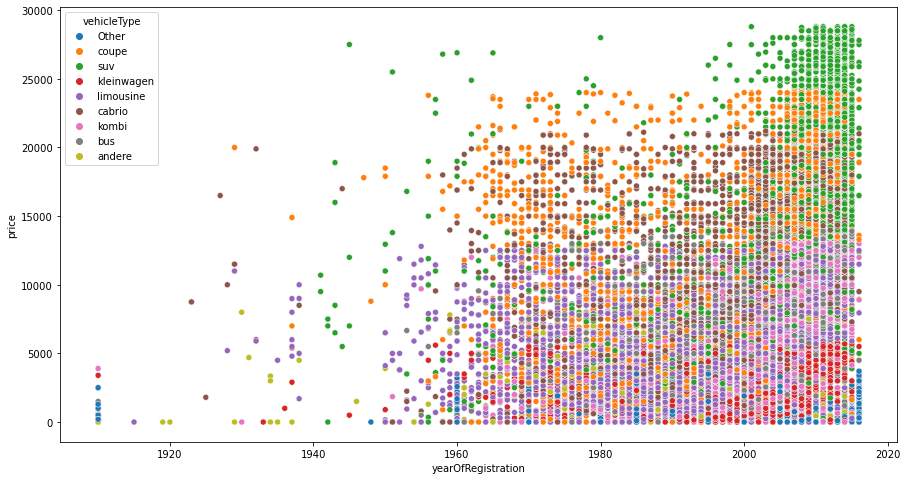

In [83]:
# Gráfico de Dispersão
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df, x='yearOfRegistration', y='price', hue="vehicleType", ax=ax)

In [84]:
# Correlação
df.corr(method = 'pearson')

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld,monthOfCreation_num
price,1.000000,0.376027,0.163499,-0.268458,0.070188,-0.006221,NaN,0.133884,-0.018861,-0.376027,-0.097924,0.014080
yearOfRegistration,0.376027,1.000000,0.048782,-0.114523,0.028707,-0.000559,NaN,0.002932,0.002358,-1.000000,-0.067759,0.000960
powerPS,0.163499,0.048782,1.000000,0.022740,0.021155,-0.000509,NaN,0.020227,-0.002630,-0.048782,-0.037124,0.002705
kilometer,-0.268458,-0.114523,0.022740,1.000000,0.004220,0.004046,NaN,-0.049819,0.009323,0.114523,-0.020406,-0.001631
postalCode,0.070188,0.028707,0.021155,0.004220,1.000000,0.001371,NaN,0.027324,0.003309,-0.028707,-0.010752,0.010286
yearOfCreation,-0.006221,-0.000559,-0.000509,0.004046,0.001371,1.000000,NaN,-0.148169,-0.002086,0.000559,-0.002185,-0.158738
yearCrawled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoOfDaysOnline,0.133884,0.002932,0.020227,-0.049819,0.027324,-0.148169,NaN,1.000000,-0.141280,-0.002932,0.002303,-0.304347
NoOfHrsOnline,-0.018861,0.002358,-0.002630,0.009323,0.003309,-0.002086,NaN,-0.141280,1.000000,-0.002358,-0.005850,0.102240
yearsOld,-0.376027,-1.000000,-0.048782,0.114523,-0.028707,0.000559,NaN,-0.002932,-0.002358,1.000000,0.067759,-0.000960


In [85]:
# Assimetria
df.skew()

price                    1.941238
yearOfRegistration      -1.956417
powerPS                 61.679011
kilometer               -1.993883
postalCode               0.082331
yearOfCreation        -119.396970
yearCrawled              0.000000
NoOfDaysOnline           1.791657
NoOfHrsOnline           -0.084693
yearsOld                 1.956417
monthsOld               -0.106685
monthOfCreation_num      2.269999
dtype: float64

In [86]:
# Achatamento
df.kurtosis()

price                      4.624450
yearOfRegistration        16.477746
powerPS                 4806.698766
kilometer                  3.183443
postalCode                -0.960302
yearOfCreation         14253.727285
yearCrawled                0.000000
NoOfDaysOnline            23.474370
NoOfHrsOnline             -1.029770
yearsOld                  16.477746
monthsOld                 -1.310060
monthOfCreation_num       14.364032
dtype: float64

In [ ]:
# dados.Age.value_counts() # Distribuição de Frequências
# df.Age.value_counts(bins = 5) # Definindo nº de Classes

## Statistical Data Visualization

In [87]:
import matplotlib.pyplot as plt # Visualização Interativa
%matplotlib inline

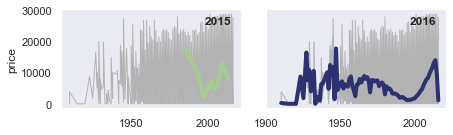

In [91]:
sns.set_theme(style="dark")
                     
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="yearOfRegistration", y="price", col="yearOfCreation", hue="yearOfCreation",
    kind="line", palette="crest", linewidth=4, zorder=12,
    col_wrap=5, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for yearOfCreation, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, yearOfCreation, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df, x="yearOfRegistration", y="price", units="yearOfCreation",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "price")
g.tight_layout()

<AxesSubplot:xlabel='monthOfCreation', ylabel='price'>

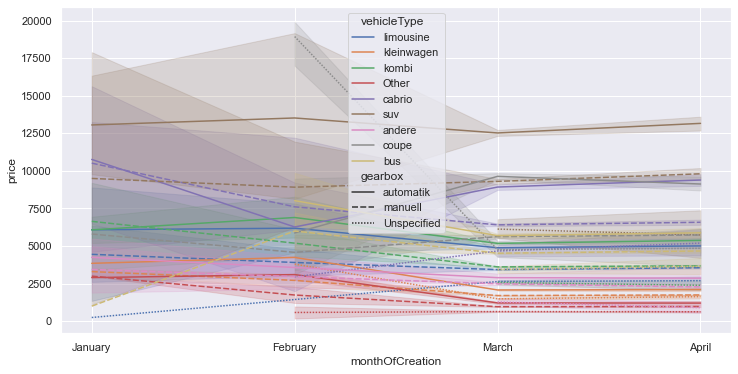

In [123]:
# import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
dataset = df[df.yearOfCreation == 2016].sort_values(["yearOfCreation", "monthOfCreation_num"])

# Plot the responses for different events and regions
sns.lineplot(x="monthOfCreation", y="price",
             hue="vehicleType", style="gearbox",
             data=dataset)

In [44]:
# Density Plot Univariado
plot(kind = 'density',
        subplots = True,
        # layout = (3, 3),
        sharex = False)
plt.show()

NameError: name 'plot' is not defined

<AxesSubplot:xlabel='monthOfCreation', ylabel='price'>

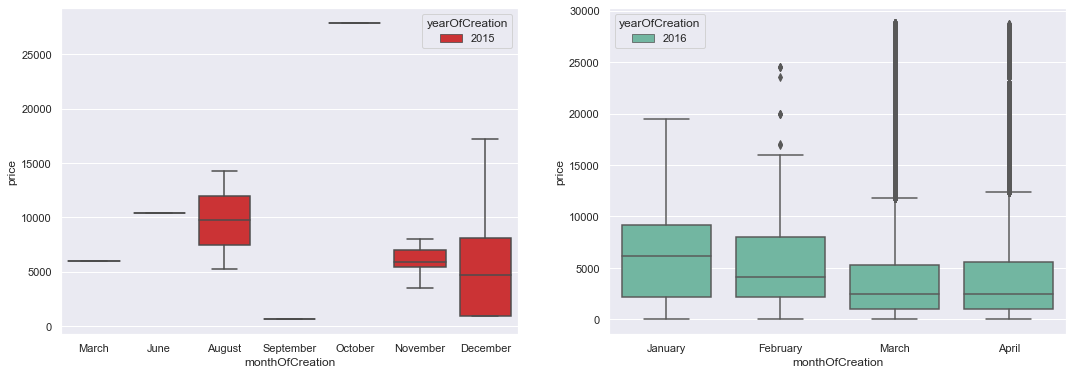

In [126]:
fig, (ax1, ax2) = plt.subplots(figsize=(18, 6), ncols = 2)

dataset = df[df.yearOfCreation == 2015].sort_values('monthOfCreation_num')

# Box e Whisker Plots
sns.boxplot(
    x = 'monthOfCreation', 
    y = 'price', 
    hue = 'yearOfCreation',
    palette = 'Set1',
    ax = ax1,
    data = dataset)

dataset = df[df.yearOfCreation == 2016].sort_values('monthOfCreation_num')

# Box e Whisker Plots
sns.boxplot(
    x = 'monthOfCreation', 
    y = 'price', 
    hue = 'yearOfCreation',
    palette = 'Set2',
    ax = ax2,
    data = dataset)


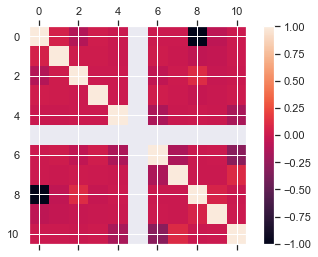

In [128]:
# Matriz de Correlação Genérica
correlacoes = df[feature_names].corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacoes,
                 vmin = -1,
                 vmax = 1)
fig.colorbar(cax)
plt.show()

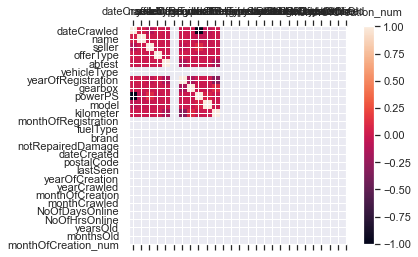

In [129]:
import numpy as np

# Matriz de Correlação com Nomes das Variáveis
correlacoes = df[feature_names].corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacoes,
                 vmin = -1,
                 vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(feature_names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)
plt.show()

C:\Users\ulp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 2016.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ulp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 2016.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ulp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2016.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


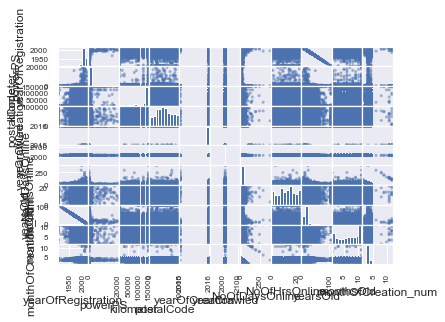

In [131]:
# Scatter Plot
pd.plotting.scatter_matrix(df[feature_names])
plt.show()

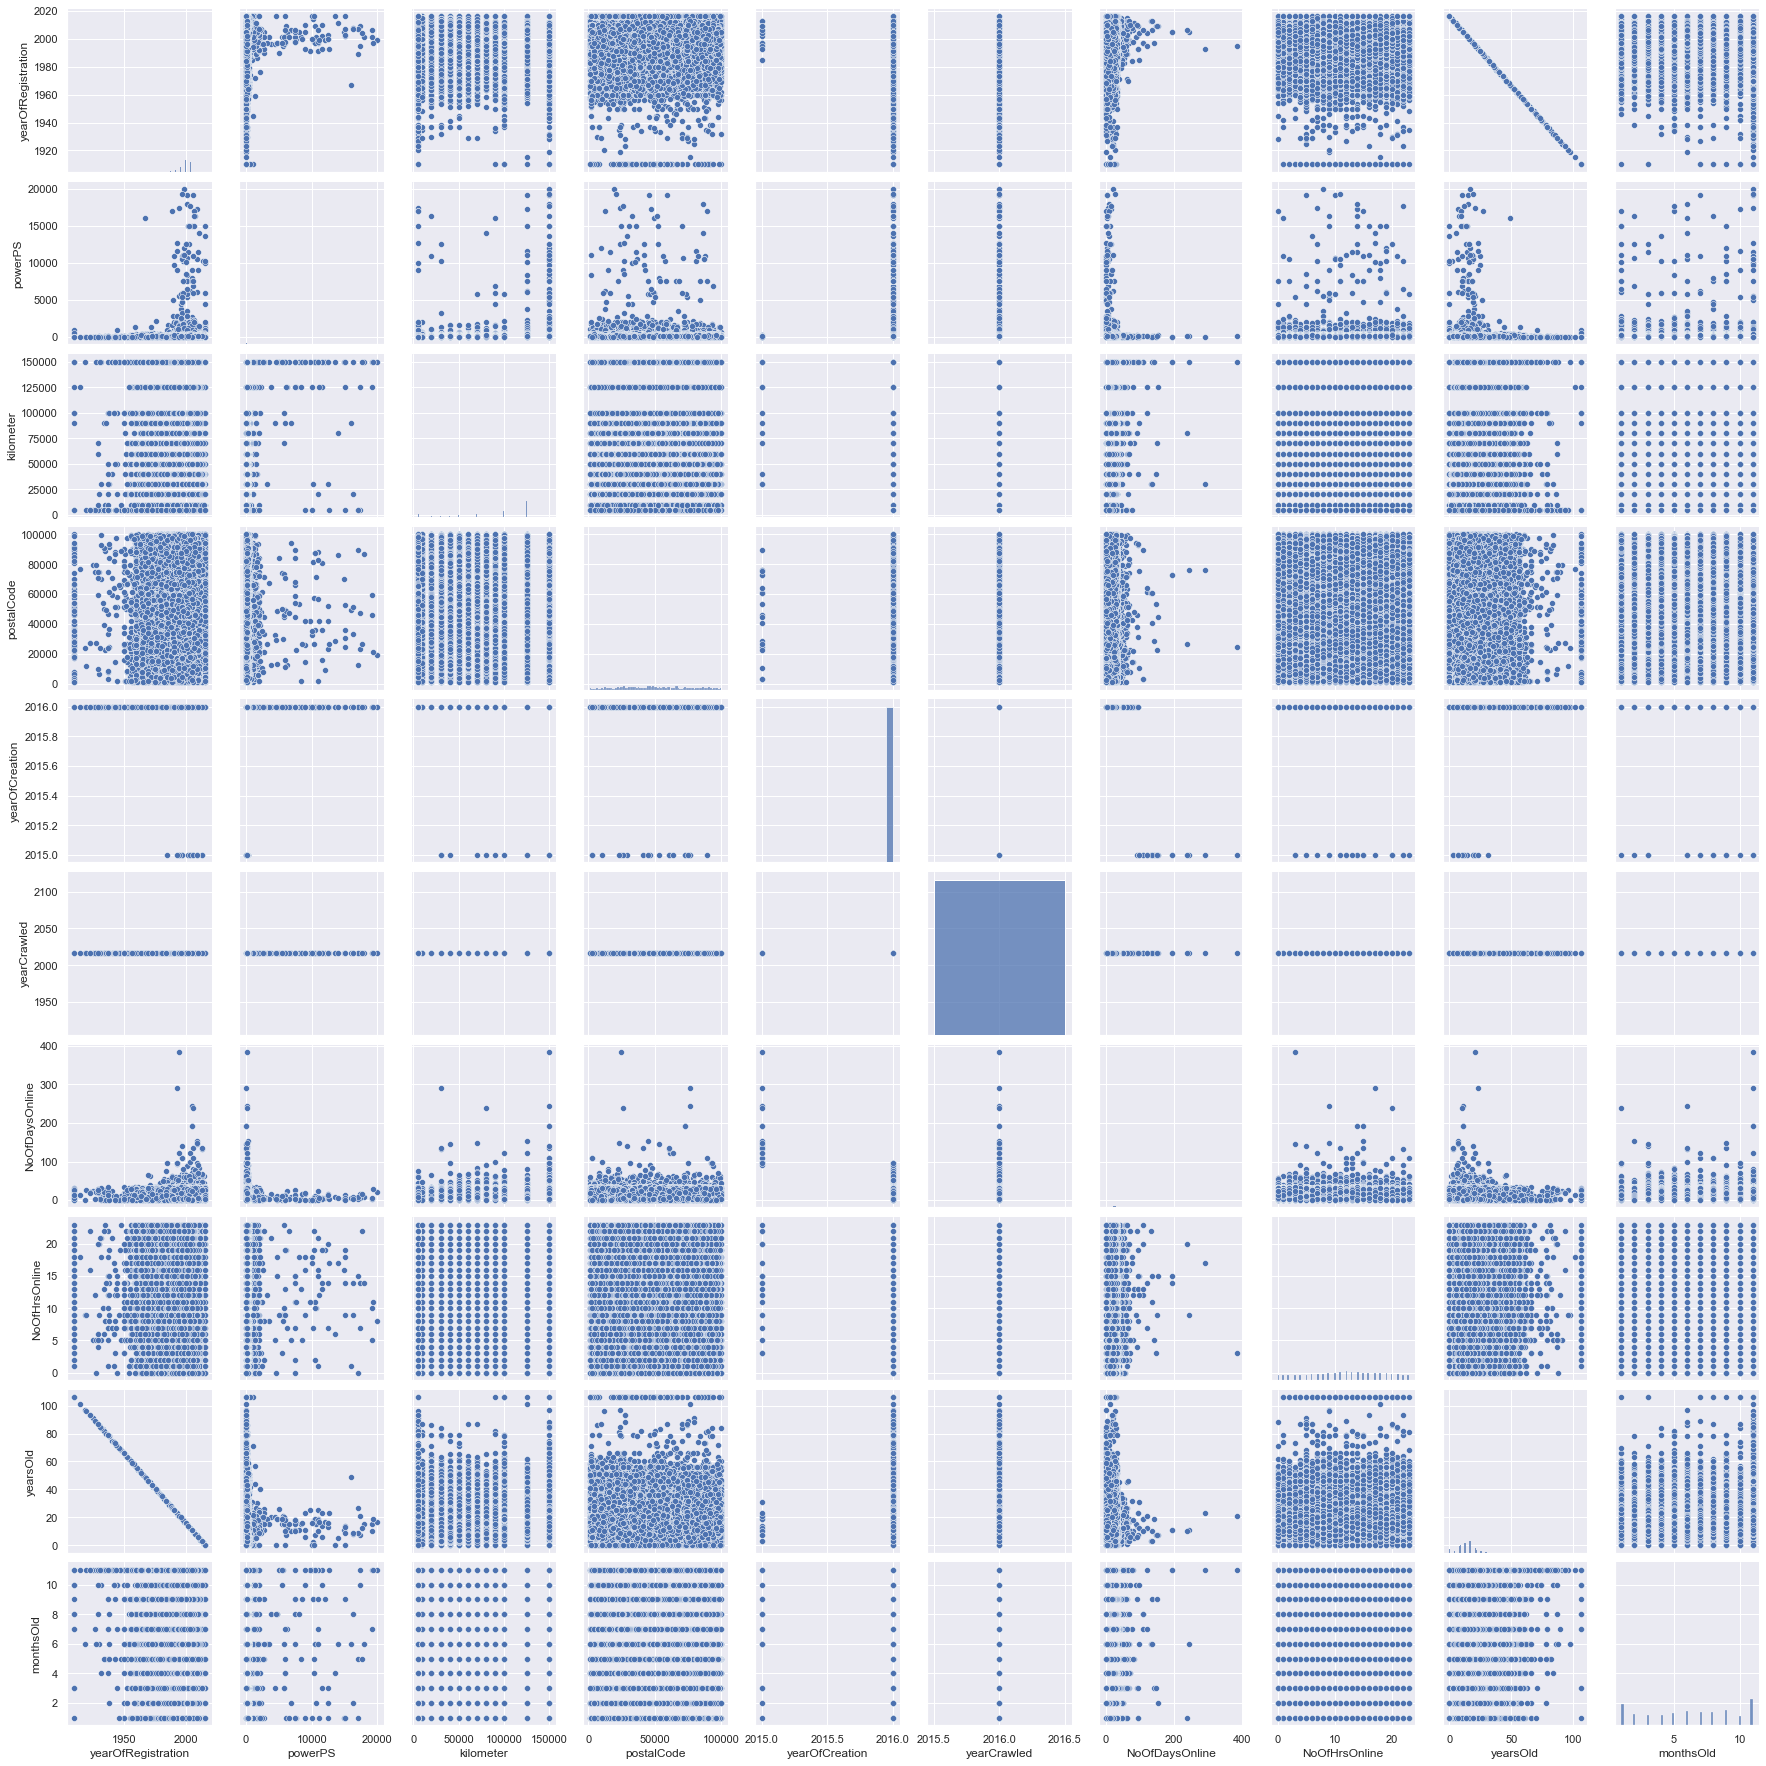

In [49]:
# Pairplot
sns.pairplot(df[feature_names])

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
# Boxplot com orientação vertical
sns.boxplot(data = data[feature_names],
            orient = "v")

In [ ]:
from scipy import stats

In [ ]:
# Clustermap
sns.clustermap(df[feature_names].dropna())

In [ ]:
# Distribuição Normal
sns.displot(df, fit = stats.norm)

## Interpret Results

### ...